In [4]:
import cv2
import numpy as np

# Create a black canvas
canvas = np.zeros((600, 800, 3), dtype=np.uint8)

# Run the animation loop
while True:
    # Clear the canvas with a black background
    canvas.fill(255)

    # Calculate the center of the canvas
    center_x, center_y = canvas.shape[1] // 2, canvas.shape[0] // 2

    # Use nested for loops to draw circles
    for i in range(50):
        for j in range(50):
            # Calculate circle position based on time and angle
            angle = cv2.getTickCount() / cv2.getTickFrequency() * 0.2
            radius = 50
            x = int(center_x+ 20* radius * np.cos(angle + i * 0.1))
            y = int(center_y + 20*radius * np.cos(angle + j * 0.1))

            # Draw circles
            cv2.circle(canvas, (x, y), 8, (50,205,50), -1)

    # Display the canvas
    cv2.imshow("Animation", canvas)

    # Break the loop if the 'Esc' key is pressed
    if cv2.waitKey(30) == 27:
        break

cv2.destroyAllWindows()


In [2]:
import numpy as np
with open('data/cmoa_clean.tsv') as f:
    cmoa_data = np.loadtxt(f, dtype = 'O', skiprows=1, delimiter="\t")
    cmoa_data[:,3] = cmoa_data[:,3].astype(float)
    cmoa_data[:,4] = cmoa_data[:,4].astype(float)
    cmoa_data = np.array(cmoa_data)

medium_type = cmoa_data[:,2]
type_counts = np.unique(medium_type, return_counts=True)

# Identifying the most common type
most_common_type = type_counts[0][np.argmax(type_counts[1])]
print(most_common_type)

gelatin silver print


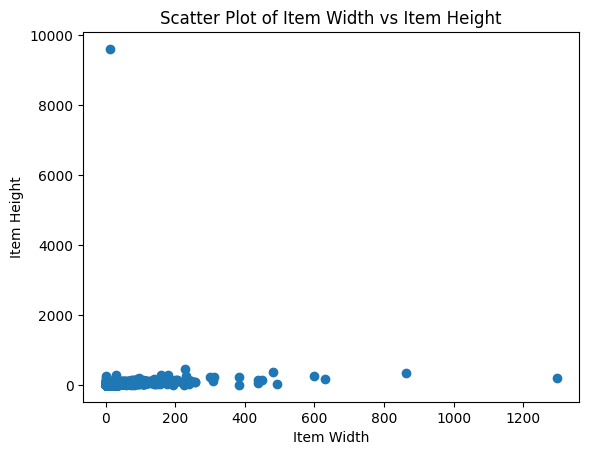

In [6]:
import matplotlib.pyplot as plt

title=cmoa_data[:,0]
creation_date=cmoa_data[:,1]
medium=cmoa_data[:,2]
item_width=cmoa_data[:,3]
item_height=cmoa_data[:,4]
full_name=cmoa_data[:,5]
birth_place=cmoa_data[:,6]

# print(x,y)

# Scatter plot
plt.scatter(item_width, item_height)

# Add labels and title
plt.xlabel('Item Width')
plt.ylabel('Item Height')
plt.title('Scatter Plot of Item Width vs Item Height')

plt.show()


In [ ]:
print(creation_date)

['1984' '1964-1965' '1999' ... 'c. 1867-1869' 'c. 1881' '1891']


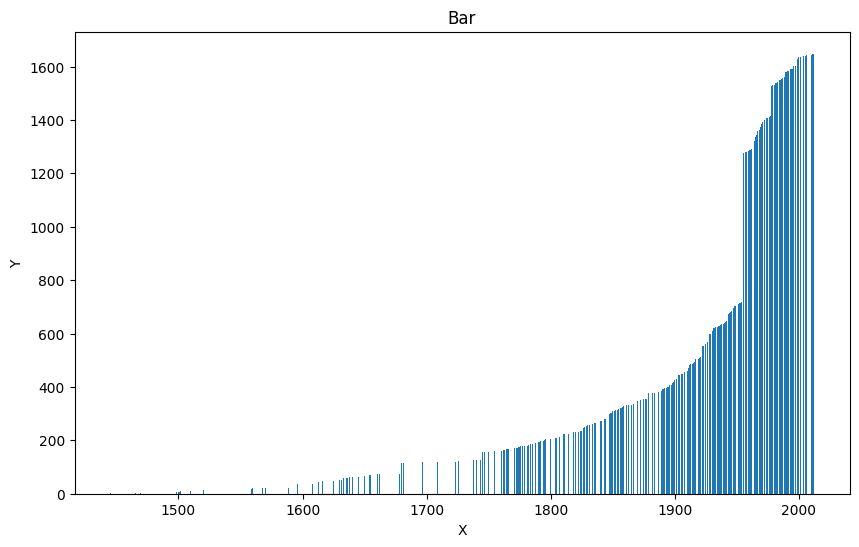

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
from scipy.optimize import curve_fit

# Extract the year from date-like strings
def extract_average_year(date_str):
    try:
        # Split the range into two years using 'c.' as separator
        start_year, end_year = map(int, date_str.split('c. '))
        # Calculate the average year
        return start_year
    except ValueError:
        try:
            # Split the range into two years using '-' as separator
            start_year, end_year = map(int, date_str.split('-'))
            # Calculate the average year
            return start_year
        except ValueError:
            # If parsing fails in all cases, return None or handle it in another way based on your requirements
            return None

# Process the date-like strings in the creation_date array
x = np.zeros_like(creation_date, dtype=float)
for i in range(len(creation_date)):
    year = extract_average_year(str(creation_date[i]))
    if year is not None:
        x[i] = year

# Create a mask for non-zero values
non_zero_mask = (x != 0) 
x_filtered = x[non_zero_mask]

# Sort the data for plotting
sorted_indices = np.argsort(x_filtered)
sorted_x = x_filtered[sorted_indices]

# Create a list of unique labels (numbers)
labels = list(range(1, len(x_filtered) + 1))

plt.figure(figsize=(10, 6))
plt.bar(sorted_x, labels)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bar')

# Show the plot
plt.show()


Samuel Rosenberg: 629次
W. Eugene Smith: 571次
Charles -Teenie- Harris: 553次
Luke Swank: 338次
Hiroshige Andō: 245次
Zoe Strauss: 221次
Otto Gerhard Leopold: 203次
David C. Hale|Office of Henry Hobson Richardson: 152次
Clyde Hare: 142次
Duane Michals: 135次
Benton Murdoch Spruance: 128次
James Abbott McNeill Whistler: 126次
Katsushika Hokusai: 125次
Claude Mellan: 120次
Zeshin Shibata: 120次
Francisco de Goya: 110次
Meissen Porcelain Manufactory: 108次
Ivan Lackovic-Croata: 100次
Pierre Alechinsky: 99次
Childe Hassam: 97次
Rudolph Ruzicka: 94次
Georges Rouault: 89次
Albrecht Dürer: 82次
Hermann Gretsch|Arzberg Porzellanfabrik: 82次
Lawrence B. Saint: 81次
Francesco Bartolozzi|Hans Holbein the Younger: 79次
Josef Albers: 78次
John Lefebre: 77次
Alfred Bendiner: 77次
Mel Bochner: 74次
Kunisada (Toyokuni III): 71次
Hew Charles Torrance: 68次
Rembrandt Harmensz. van Rijn: 66次
Jacques Callot: 64次
Timothy Cole|Century Company: 63次
John Hancock|John Hancock the elder|John Hancock , Jr.: 61次
Kawase Hasui|Watanabe Shôzaburô:

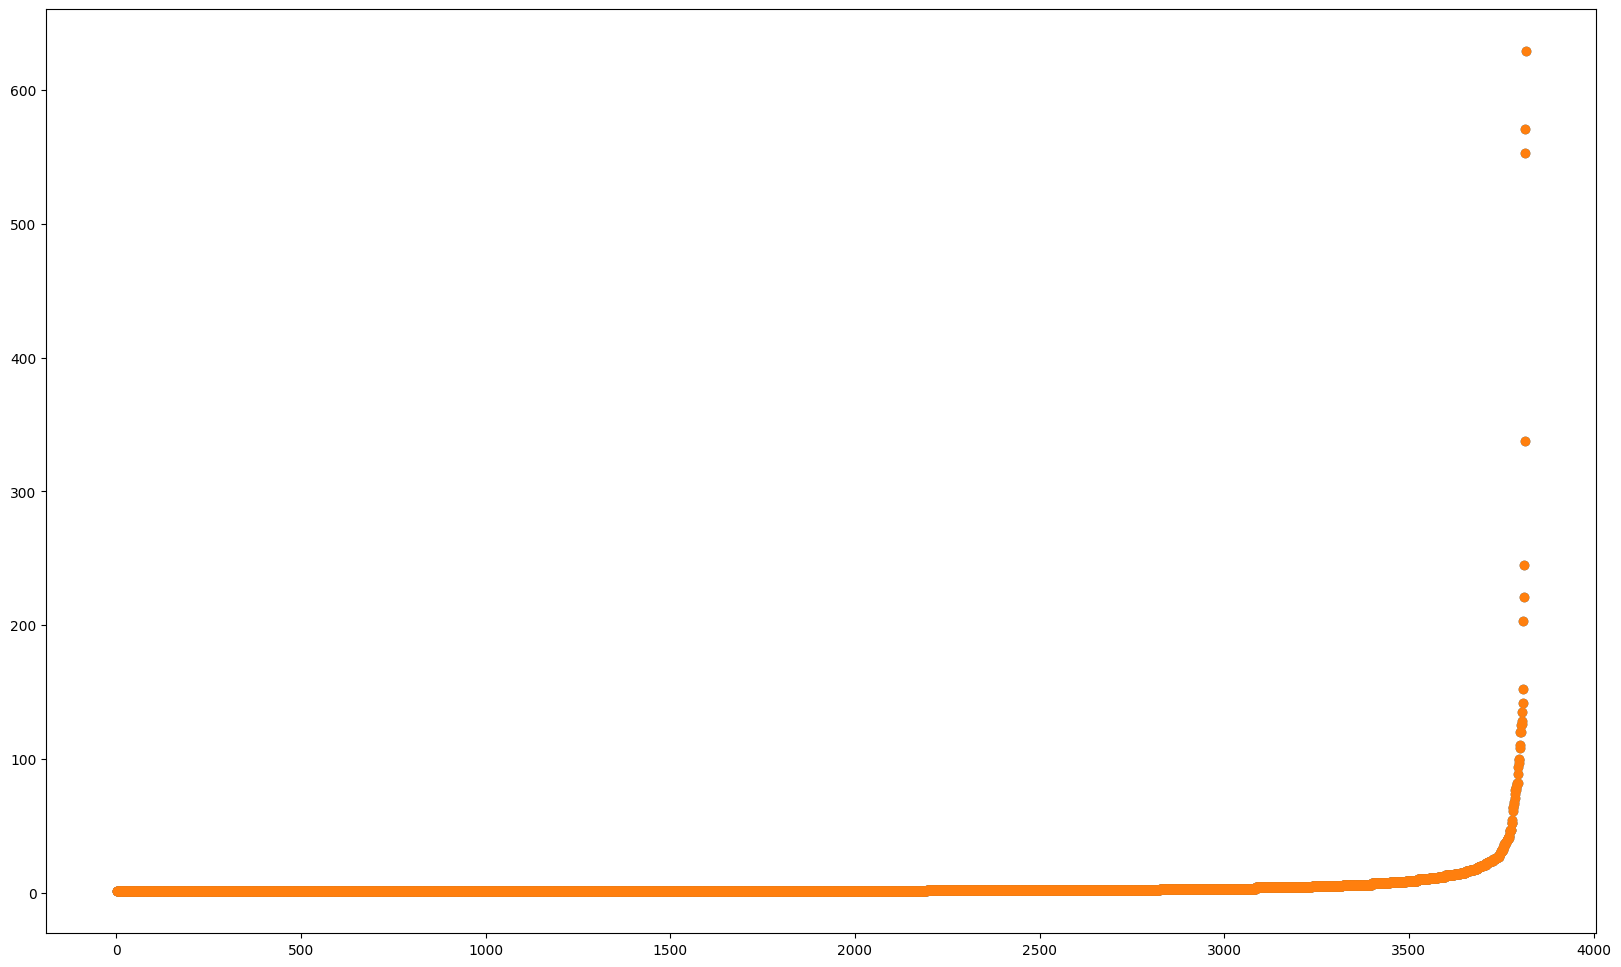

In [47]:
from collections import Counter

# 使用Counter统计词频，将具有相同开头的艺术家名称视为同一个人
word_count = Counter()
for word in full_name:
    # 如果艺术家名称以"Christopher Dresser"开头，则将其替换为"Christopher Dresser"
    if word.startswith("Christopher Dresser"):
        word = "Christopher Dresser"
    
    # 更新Counter
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

# 按照词频从大到小排序
sorted_word_count = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))

# 打印结果
for word, count in sorted_word_count.items():
    print(f"{word}: {count}次")

# 获取所有计数值作为数组
count_array = np.array(list(word_count.values()))

# 对计数值进行排序
sorted_indices = np.argsort(count_array)
count_array1 = count_array[sorted_indices]

# 创建一个包含唯一标签的列表
labels = list(range(1, len(count_array1) + 1))

fig, ax = plt.subplots(figsize=(20, 12))
ax.scatter(labels, count_array1)

# ax.set_xscale('log', base=1000)
# ax.set_yscale('log', base=10)

ax.scatter(labels, count_array1)

plt.show()
